In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
pip install

In [ ]:
 pip install sklearn

In [60]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, \
                             accuracy_score)
import cv2

In [3]:
train2=os.listdir("/kaggle/input/dermnet/train")

In [61]:
train2

['Light Diseases and Disorders of Pigmentation',
 'Lupus and other Connective Tissue diseases',
 'Acne and Rosacea Photos',
 'Systemic Disease',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Vascular Tumors',
 'Urticaria Hives',
 'Atopic Dermatitis Photos',
 'Bullous Disease Photos',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Melanoma Skin Cancer Nevi and Moles',
 'Nail Fungus and other Nail Disease',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Eczema Photos',
 'Exanthems and Drug Eruptions',
 'Herpes HPV and other STDs Photos',
 'Seborrheic Keratoses and other Benign Tumors',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Vasculitis Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Warts Molluscum and other Viral Infections']

In [6]:
cat2=['Melanoma Skin Cancer Nevi and Moles']

In [7]:
cat=['Acne and Rosacea Photos',
 'Normal',
 'vitiligo',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
     'Melanoma Skin Cancer Nevi and Moles',
 'Eczema Photos']

In [62]:
cat=['Normal','Eczema Photos']

In [63]:
def data_dictionary():
    path_train="/kaggle/input/skindatasets/skin/train/"
    path_test="/kaggle/input/dermnet/train/"
    list_train=cat#os.listdir(path_train)
    #list_train1=cat2
    train_dictionary={"image_path":[],"target":[]}
    test_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        path_disease_train=path_train+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j            
            if img_path_train!="/kaggle/input/skindatasets/skin/train/Normal/34.avif":
                train_dictionary["image_path"].append(img_path_train)
                train_dictionary['target'].append(k) 
        k+=1
    '''
        for i in list_train1:
        path_disease_test=path_test+i
        image_list_test=os.listdir(path_disease_test)
        for j in image_list_test:
            img_path_train=path_disease_test+"/"+j            
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(4)
    '''

    train_df=pd.DataFrame(train_dictionary)
    return  train_df

In [64]:
train=data_dictionary()

In [ ]:
pip install opencv-python

In [65]:


import cv2
images=[]
label=[]
for i in train['image_path']:
    if i!="/kaggle/input/skindatasets/skin/train/Normal/34.avif":
        img=cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,(180,180))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #img=cv2.resize(img,(64,64),interpolation=cv2.INTER_AREA)
        #img=resize_and_rescale(img)
        images.append(img)


In [66]:
label=train['target']

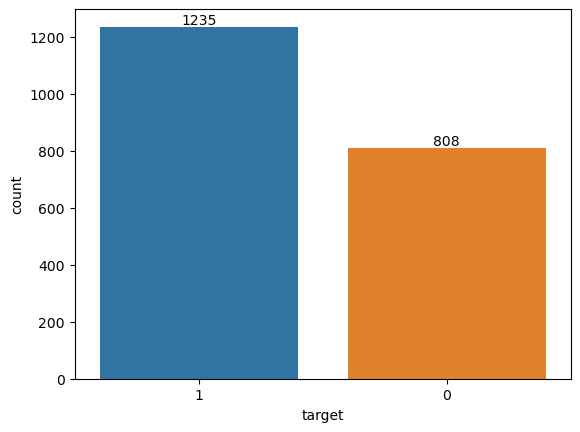

In [67]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, \
                             accuracy_score)

ax = sns.countplot(x=train['target'],
                   order=train['target'].value_counts(ascending=False).index);

abs_values = train['target'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values);

In [68]:
len(label)

2043

In [69]:
len(images)

2043

In [70]:
import numpy as np
import pandas as pd

In [71]:
data=np.array(images)


In [72]:
label=np.array(label)

In [73]:
data.shape

(2043, 180, 180, 3)

In [74]:
label.shape

(2043,)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2,random_state=4)
#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2,random_state=1)

In [76]:
X_train.shape

(1634, 180, 180, 3)

In [77]:
X_test.shape

(409, 180, 180, 3)

In [78]:
y_test.shape

(409,)

In [79]:
import keras
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)


In [80]:
y_test=keras.utils.to_categorical(y_test, num_classes)

In [81]:
y_test.shape

(409, 2)

In [82]:
y_train.shape

(1634, 2)

In [83]:
from tensorflow.keras.applications import  VGG19,EfficientNetB0,VGG16,InceptionV3,ResNet50
from tensorflow.keras.models import Model
from keras.applications.vgg16 import preprocess_input


In [84]:
vgg_model = EfficientNetB0(weights = 'imagenet',  include_top = False, input_shape = (180, 180, 3)) 

In [85]:
# let's make all layers non-trainable
for layer in vgg_model.layers : 
    layer.trainable = False

In [86]:
features_train=vgg_model.predict(X_train)

52/52 [==============================] - 3s 38ms/step


In [87]:
import pickle
pickle.dump(features_train, open('features_train.pkl', 'wb'))


In [88]:
features_test=vgg_model.predict(X_test)

13/13 [==============================] - 0s 36ms/step


In [89]:
features_train.shape

(1634, 6, 6, 1280)

In [90]:
features_test.shape

(409, 6, 6, 1280)

In [91]:
num_train=X_train.shape[0]
num_test=X_test.shape[0]

In [92]:
x_test=features_test.reshape(num_test,-1)

In [93]:
x_test.shape

(409, 46080)

In [94]:
x_train=features_train.reshape(num_train,-1)

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense


In [96]:
model=Sequential([
                  Dense(1024,activation='relu'),
                   Dense(512,activation='relu'),
                  Dense(256,activation='relu'),
                  Dense(2,activation='softmax'),

])

In [97]:
x_test.shape

(409, 46080)

In [98]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [99]:
mcp_save = ModelCheckpoint('EnetB0_CIFAR10_TL.h5', save_best_only=True, monitor='val_acc')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, verbose=1,)

In [100]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [101]:
history=model.fit(x_train,y_train,batch_size=32,callbacks=[mcp_save,reduce_lr],epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
52/52 [==============================] - 3s 29ms/step - loss: 0.5941 - accuracy: 0.9431 - val_loss: 0.5581 - val_accuracy: 0.9487 - lr: 0.0010
Epoch 2/30
52/52 [==============================] - 1s 18ms/step - loss: 0.0363 - accuracy: 0.9914 - val_loss: 0.0690 - val_accuracy: 0.9927 - lr: 0.0010
Epoch 3/30
52/52 [==============================] - 1s 17ms/step - loss: 0.0065 - accuracy: 0.9988 - val_loss: 0.1415 - val_accuracy: 0.9951 - lr: 0.0010
Epoch 4/30
52/52 [==============================] - 1s 15ms/step - loss: 0.0144 - accuracy: 0.9982 - val_loss: 0.3755 - val_accuracy: 0.9853 - lr: 0.0010
Epoch 5/30
52/52 [==============================] - 1s 15ms/step - loss: 0.1339 - accuracy: 0.9951 - val_loss: 0.1505 - val_accuracy: 0.9878 - lr: 0.0010
Epoch 6/30
52/52 [==============================] - 1s 16ms/step - loss: 0.0048 - accuracy: 0.9994 - val_loss: 0.5057 - val_accuracy: 0.9829 - lr: 0.0010
Epoch 7/30
52/52 [==============================] - 1s 15ms/step - loss: 0.0

In [102]:
_, acc = model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 6ms/step - loss: 0.5957 - accuracy: 0.9878


In [103]:
model.save('6claass.h5')

In [104]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix

In [105]:
y_pred=model.predict(x_test)

13/13 [==============================] - 0s 5ms/step


In [106]:
y_pred2=np.argmax(y_pred, axis=1)
y_pred2

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,

In [107]:
y_test=np.argmax(y_test, axis=1)

In [108]:
y_test

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,

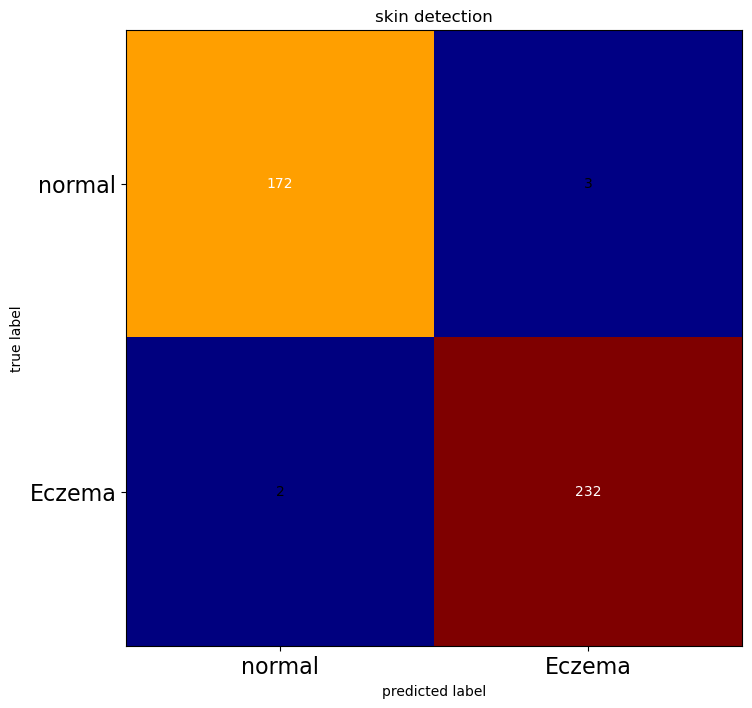

Report Summary:
Precision	: 98.72%
Recall		: 99.15%
F1 Score	: 98.93%


In [109]:
confusion_matrix_result = confusion_matrix(y_test,y_pred2)
plot_confusion_matrix(confusion_matrix_result,
                      figsize=(12,8),
                      hide_ticks=True,
                      cmap=plt.cm.jet)
plt.title("skin detection")
plt.xticks(range(2), ['normal', 'Eczema'], fontsize=16)
plt.yticks(range(2), ['normal', 'Eczema'], fontsize=16)
plt.show()
# Precision and Recall metrics
tn, fp, fn, tp = confusion_matrix_result.ravel()
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1_score = 2 * precision * recall / (precision+recall)
print("Report Summary:")
print("Precision\t: {:.2f}%".format(precision*100))
print("Recall\t\t: {:.2f}%".format(recall*100))
print("F1 Score\t: {:.2f}%".format(f1_score*100))


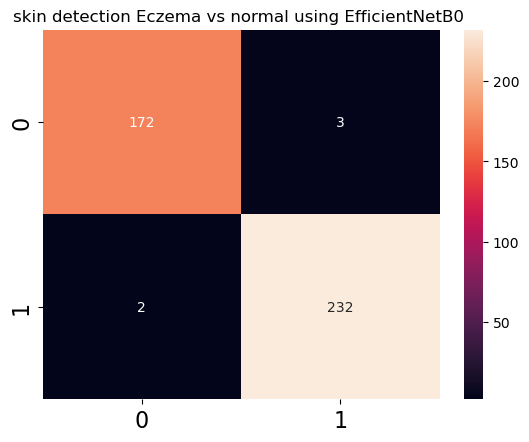

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt     
import pylab as pl
plt.title("skin detection Eczema vs normal using EfficientNetB0 ")
plt.xticks(range(2), ['normal', 'Eczema'], fontsize=16)
plt.yticks(range(2), ['normal', 'Eczema'], fontsize=16)
ax= plt.subplot()
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', ax=ax);
pl.show()

In [171]:
import plotly.express as px

fig = px.imshow(confusion_matrix_result, text_auto=True)
fig.show()

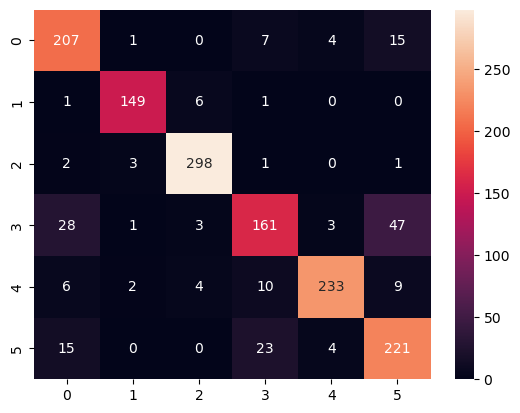

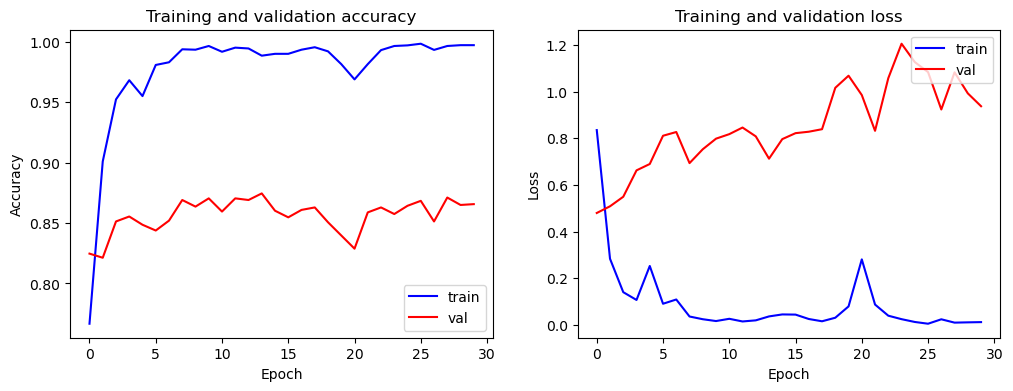

In [177]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(train_accuracy))
plt.figure(figsize=(12,4))

# Plotting the accuracy
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')

# Plotting the loss
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

In [37]:
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D,MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import pandas as pd
import tensorflow as tf
import keras
import pickle

In [163]:
confusion_matrix=classification_report(y_test,y_pred2)



In [164]:
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       234
           1       0.96      0.95      0.95       157
           2       0.96      0.98      0.97       305
           3       0.79      0.66      0.72       243
           4       0.95      0.88      0.92       264
           5       0.75      0.84      0.79       263

    accuracy                           0.87      1466
   macro avg       0.87      0.87      0.87      1466
weighted avg       0.87      0.87      0.86      1466



In [ ]:
y_pred=model.predict(x_test)

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(train_accuracy))
plt.figure(figsize=(12,4))
# Plotting the accuracy
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')

# Plotting the loss
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix


In [ ]:
from lightgbm.sklearn import LGBMClassifier

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components =500)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)


In [40]:
y_train.shape

(5864,)

In [41]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)

NameError: name 'LGBMClassifier' is not defined

In [ ]:
X_train.shape

In [ ]:
y_pred2=lgbm.predict(X_test)


In [ ]:
y_pred2

In [ ]:
y_test

In [ ]:
from sklearn.metrics import *
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
confusion_matrix_result = confusion_matrix(y_test, y_pred2)


In [ ]:
confusion_matrix_result

In [ ]:

confusion_matrix_result = accuracy_score(y_test, y_pred2)

In [ ]:
confusion_matrix_result

In [42]:

pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [43]:
from lazypredict.Supervised import LazyClassifier
clf= LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train,X_test,y_train,y_test)

100%|██████████| 29/29 [07:35<00:00, 15.72s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.86,0.86,None,0.86,15.34
LGBMClassifier,0.85,0.85,None,0.85,47.62
XGBClassifier,0.85,0.85,None,0.85,232.15
NuSVC,0.84,0.84,None,0.84,17.69
RidgeClassifierCV,0.83,0.84,None,0.83,0.82
RidgeClassifier,0.83,0.84,None,0.83,0.18
NearestCentroid,0.83,0.83,None,0.83,0.19
LinearDiscriminantAnalysis,0.83,0.83,None,0.83,1.00
LogisticRegression,0.83,0.83,None,0.83,1.71


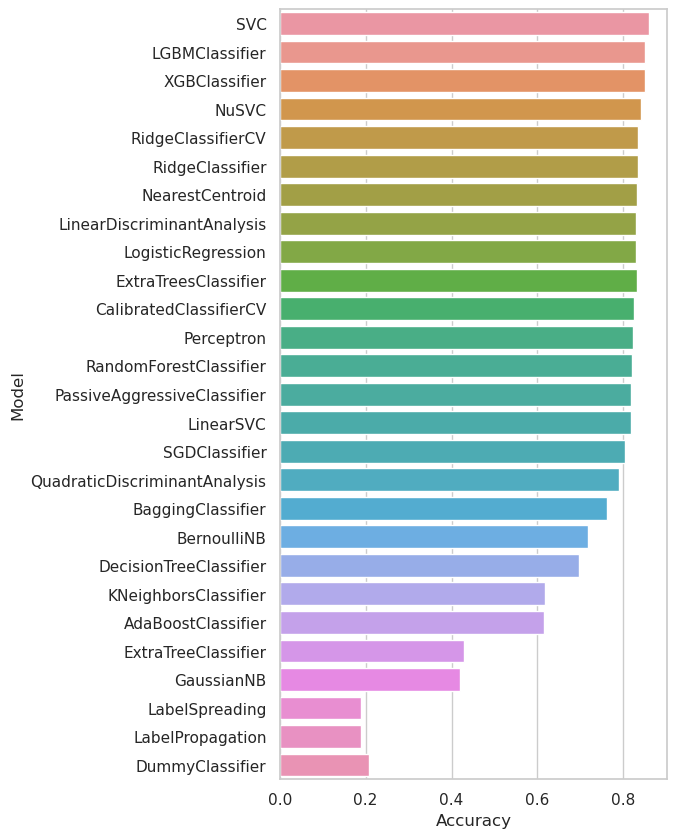

In [48]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="Accuracy", data=predictions)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
y_test

In [ ]:
y_pred.shape

In [ ]:
y_pred2=np.argmax(y_pred, axis=1)
y_pred2

In [ ]:
y_test=np.argmax(y_test, axis=1)


In [ ]:
from sklearn.metrics import *
print(classification_report(y_test, y_pred2))


In [ ]:
confusion_matrix_result